In [ ]:
# google drive connect
Copied_path = '/content/drive/MyDrive/Colab Notebooks/MyPaper/GlocalSTN' # Paste target directory here
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir(Copied_path)

Mounted at /content/drive


In [ ]:
import pandas as pd
import json
from pandas import json_normalize

with open("./gowalla/gowalla_category_structure.json", "r") as st_json:
    st_python = json.load(st_json)

df = json_normalize(st_python['spot_categories']) 


def cat_map(sub_cat) :
  j = -1
  for i in range(0, df.shape[0]) :
    if str(df['spot_categories'][i]).find(sub_cat) > -1 :      
      j = i      
  if j == -1 :
    output = 'N/A'
  else :
    output = df['name'][j]
  return output


file = pd.read_csv('./gowalla/gowalla_spots_subset1.csv')
for i in range(0, file.shape[0]) :
  file['spot_categories'][i] = cat_map(file['spot_categories'][i].split(',')[1].split(':')[1].rstrip(']').rstrip('}').lstrip()[1:-1])

file.to_csv('./gowalla/gowalla_spots_subsetwcat.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
import pandas as pd
file = pd.read_csv('./gowalla/gowalla_spots_subsetwcat.csv')

In [ ]:
file.head()

,Unnamed: 0,id,created_at,lng,lat,photos_count,checkins_count,users_count,radius_meters,highlights_count,items_count,max_items_count,spot_categories
0,0,8904,2008-12-06T16:28:53Z,-94.607499,39.052318,0,114,21,35,0,10,10,Community
1,1,8932,2008-12-13T02:16:51Z,-97.254356,32.927662,2,67,48,75,0,6,10,Food
2,2,8936,2008-12-14T22:08:39Z,-94.591995,39.053318,0,75,46,75,0,10,10,Entertainment
3,3,8938,2008-12-15T00:22:49Z,-94.590311,39.052824,38,438,94,50,10,10,10,Food
4,4,8947,2008-12-16T23:14:05Z,-122.029631,37.331880,91,3100,1186,200,20,10,10,Community


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


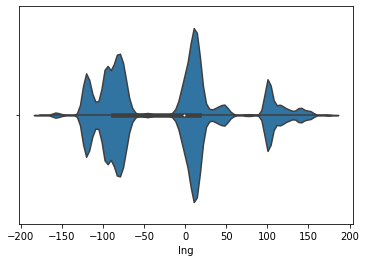

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.violinplot(file['lng'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


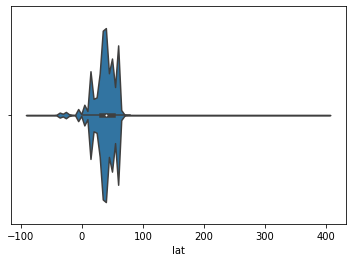

In [ ]:
sns.violinplot(file['lat'])

In [ ]:
'''
from sklearn.cluster import DBSCAN

feature = file[['lng','lat']]
model = DBSCAN(min_samples=6)
predict = pd.DataFrame(model.fit_predict(feature))
predict.columns=['predict']

r = pd.concat(file,predict,axis=1)
'''
import seaborn as sns
points = file[['lng', 'lat']]
#sns.scatterplot(x=file['lng'], y=file['lat'], data=points, palette="Set2");

from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=300)
kmeans.fit(points)

result_by_sklearn = points.copy()
result_by_sklearn["cluster"] = kmeans.labels_
result_by_sklearn.head()

,lng,lat,cluster
0,-94.607499,39.052318,89
1,-97.254356,32.927662,72
2,-94.591995,39.053318,89
3,-94.590311,39.052824,89
4,-122.029631,37.331880,197


In [ ]:
cluster_num = 1
print(result_by_sklearn[result_by_sklearn['cluster'] == cluster_num]['lng'].shape, result_by_sklearn[result_by_sklearn['cluster'] == cluster_num]['lng'].max() - result_by_sklearn[result_by_sklearn['cluster'] == cluster_num]['lng'].min(), result_by_sklearn[result_by_sklearn['cluster'] == cluster_num]['lat'].max() - result_by_sklearn[result_by_sklearn['cluster'] == cluster_num]['lat'].min())

(113965,) 4.841329878999986 4.031959206000002


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


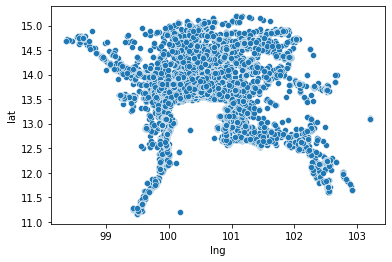

In [ ]:
cluster_num = 1
sns.scatterplot(result_by_sklearn[result_by_sklearn['cluster'] == cluster_num]['lng'], result_by_sklearn[result_by_sklearn['cluster'] == cluster_num]['lat'])

In [ ]:
file['cluster'] = kmeans.labels_
#r = pd.concat(file,result_by_sklearn["cluster"],axis=1)

In [ ]:
file.head()

,Unnamed: 0,id,created_at,lng,lat,photos_count,checkins_count,users_count,radius_meters,highlights_count,items_count,max_items_count,spot_categories,cluster
0,0,8904,2008-12-06T16:28:53Z,-94.607499,39.052318,0,114,21,35,0,10,10,Community,89
1,1,8932,2008-12-13T02:16:51Z,-97.254356,32.927662,2,67,48,75,0,6,10,Food,72
2,2,8936,2008-12-14T22:08:39Z,-94.591995,39.053318,0,75,46,75,0,10,10,Entertainment,89
3,3,8938,2008-12-15T00:22:49Z,-94.590311,39.052824,38,438,94,50,10,10,10,Food,89
4,4,8947,2008-12-16T23:14:05Z,-122.029631,37.331880,91,3100,1186,200,20,10,10,Community,197


In [ ]:
file.to_csv('./gowalla/gowalla_spots_cat_grp.csv')

In [ ]:
import pandas as pd

file = pd.read_csv('./gowalla/gowalla_spots_cat_grp.csv')

In [ ]:
import datetime

file['UTC time'] = 0
for i in range(0, file.shape[0]) :
  try : 
    file['UTC time'][i] = datetime.datetime.strptime(file['created_at'][i], '%Y-%m-%dT%H:%M:%SZ')
    #print(i)
  except :
    file['UTC time'][i] = 0

#file['UTC time'] = pd.to_datetime(file['created_at'][3], format='%Y-%m-%dT%H:%M:%SZ')
#file['created_at'][3]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
#file.to_csv('./gowalla/gowalla_spots_cat_grp_UTC.csv')

import pandas as pd
file = pd.read_csv('./gowalla/gowalla_spots_cat_grp_UTC.csv')

In [ ]:
file.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,created_at,lng,lat,photos_count,checkins_count,users_count,radius_meters,highlights_count,items_count,max_items_count,spot_categories,cluster,UTC time
0,0,0,0,8904,2008-12-06T16:28:53Z,-94.607499,39.052318,0,114,21,35,0,10,10,Community,89,2008-12-06 16:28:53
1,1,1,1,8932,2008-12-13T02:16:51Z,-97.254356,32.927662,2,67,48,75,0,6,10,Food,72,2008-12-13 02:16:51
2,2,2,2,8936,2008-12-14T22:08:39Z,-94.591995,39.053318,0,75,46,75,0,10,10,Entertainment,89,2008-12-14 22:08:39
3,3,3,3,8938,2008-12-15T00:22:49Z,-94.590311,39.052824,38,438,94,50,10,10,10,Food,89,2008-12-15 00:22:49
4,4,4,4,8947,2008-12-16T23:14:05Z,-122.029631,37.331880,91,3100,1186,200,20,10,10,Community,197,2008-12-16 23:14:05


In [ ]:
#file = file[(file['UTC time'] != '0')]
#file.head()
cluster_num = 1
#file['UTC time'] = pd.to_datetime(file['UTC time'], format='%Y-%m-%d %H:%M:%S')
print(file[file['cluster'] == cluster_num]['UTC time'].max(), file[file['cluster'] == cluster_num]['UTC time'].min(), file[file['cluster'] == cluster_num]['UTC time'].max() - file[file['cluster'] == cluster_num]['UTC time'].min())

2011-07-04 14:16:24 2009-09-03 16:46:43 668 days 21:29:41


# 새 섹션

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


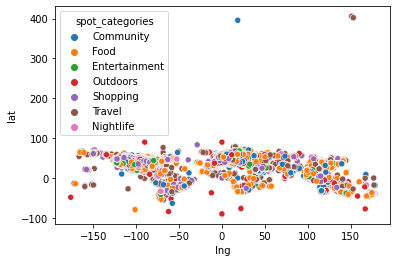

In [ ]:
import numpy as np
import datetime
import pandas as pd
from sklearn.cluster import KMeans 
import seaborn as sns

file = pd.read_csv('./gowalla/gowalla_spots_cat_grp_UTC.csv')
'''
cluster_num = 2

points = file[['lng', 'lat']]
kmeans = KMeans(n_clusters=2)
kmeans.fit(points)
file["cluster"] = kmeans.labels_

result = pd.DataFrame(pd.pivot_table(file, index=['cluster'], values='UTC time', aggfunc=np.count_nonzero)).reset_index()
cluster_num = result.sort_values('UTC time', ascending=False)['cluster'].iloc[cluster_num-1]

file = file[file['cluster'] == cluster_num]
'''
sns.scatterplot(file['lng'], file['lat'], hue=file['spot_categories'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


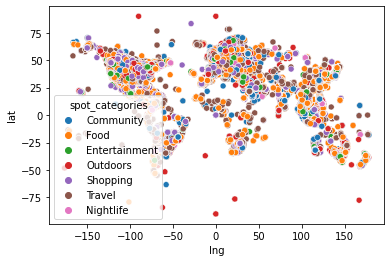

In [ ]:

#Max_lng = -60
#Min_lng =  -140
Max_lat = 100
#Min_lat = -50

#file = file[file['lng'] > Min_lng]
#file = file[file['lng'] < Max_lng]
#file = file[file['lat'] > Min_lat]
file = file[file['lat'] < Max_lat]
sns.scatterplot(file['lng'], file['lat'], hue=file['spot_categories'])


In [ ]:
num_of_xgrid = 12 # x 좌표를 몇개로 나눌건지, ST Resnet과 동일하게 맞출때

# x, y 좌표 binning        
#num_of_xgrid = 21 # x 좌표를 몇개로 나눌건지
width_of_xgrid = (float(file['lng'].max()) - float(file['lng'].min())) / num_of_xgrid
bin_of_x = np.arange(float(file['lng'].min()), float(file['lng'].max())+(width_of_xgrid/2), width_of_xgrid)
file['x'] = pd.cut(file['lng'].astype(float), bins=bin_of_x, labels=range(0, num_of_xgrid))

# y 좌표는 x, y 좌표 span의 비율만큼 위에 x grid 값에서 곱해서 구함, 최대 999보다 작아야 함
#num_of_ygrid = 21 # ST Resnet과 동일하게 맞출때
num_of_ygrid = int(num_of_xgrid * (float(file['lat'].max()) - float(file['lat'].min())) / (float(file['lng'].max()) - float(file['lng'].min())))
print("x grid =", num_of_xgrid)
print("y grid =", num_of_ygrid)
width_of_ygrid = (float(file['lat'].max()) - float(file['lat'].min())) / num_of_ygrid
bin_of_y = np.arange(float(file['lat'].min()), float(file['lat'].max())+(width_of_ygrid/2), width_of_ygrid)
file['y'] = pd.cut(file['lat'].astype(float), bins=bin_of_y, labels=range(0, num_of_ygrid))

file.drop(file[file['x'].isnull()].index, inplace=True)
file.drop(file[file['y'].isnull()].index, inplace=True)
file['xy'] = file['x'].astype(int)*1000 + file['y'].astype(int)
file.drop(file[file['xy'].isnull()].index, inplace=True)


#2008-12-06T16:28:53Z

file['UTC time'] = pd.to_datetime(file['UTC time'], format='%Y-%m-%d %H:%M:%S')

num_of_timegrid = int(((file['UTC time'].max() - file['UTC time'].min()).days + 1)/3) # time grid는 하루


width_of_timegrid = (file['UTC time'].max() - file['UTC time'].min()) / num_of_timegrid
bin_of_time = np.arange(file['UTC time'].min(), file['UTC time'].max()+(width_of_timegrid/2), width_of_timegrid)
file['time_seq'] = pd.cut(file['UTC time'], bins=bin_of_time, labels=range(0, num_of_timegrid))
file.drop(file[file['time_seq'].isnull()].index, inplace=True)

#Unnamed: 0	id	created_at	lng	lat	photos_count	checkins_count	users_count	radius_meters	highlights_count	items_count	max_items_count	spot_categories	cluster


drop_col_name=['Unnamed: 0', 'created_at', 'lng','lat', 'photos_count', 'checkins_count', 'radius_meters', 'UTC time', 'highlights_count','items_count','max_items_count','cluster', 'x', 'y']
file = file.drop(drop_col_name, axis=1)

#file1 = file[file['cate_grp']=='Shop& Service'][['xy', 'time_seq']]
#result = file.groupby(['cate_grp','time_seq','xy'], as_index=False).size()
result = pd.DataFrame(pd.pivot_table(file, index=['spot_categories','time_seq','xy'], values='users_count', aggfunc=np.sum)).reset_index()

result['x'] = result['xy'].astype(int)//1000
result['y'] = result['xy'].astype(int)%1000


matrix_row_num = result['y'].max() + 1
matrix_col_num = result['x'].max() + 1
matrix_index_num = num_of_timegrid + 1
#matrix_index_num = result['time_seq'].nunique()


crowd_flow_matrix = np.zeros((result['spot_categories'].nunique()+1, matrix_index_num, matrix_row_num, matrix_col_num))
print(crowd_flow_matrix.shape)
image_index = 0
for i in range(0, result.shape[0]) :    
    #위치 확인!!!
    image_index = result.iloc[i,1]
    row_index = result.iloc[i,5] 
    col_index = result.iloc[i,4] 
    if result.iloc[i,0] == 'Community' :
      cat_index = 0
    elif result.iloc[i,0] == 'Entertainment' :
      cat_index = 1
    elif result.iloc[i,0] == 'Food' :
      cat_index = 2
    elif result.iloc[i,0] == 'Nightlife' :
      cat_index = 3
    elif result.iloc[i,0] == 'Outdoors' :
      cat_index = 4
    elif result.iloc[i,0] == 'Shopping' :
      cat_index = 5
    elif result.iloc[i,0] == 'Travel' :
      cat_index = 6
       
    crowd_flow_matrix[cat_index, image_index, row_index, col_index] = result.iloc[i, 3]

for i in range(result['spot_categories'].nunique()+1) :
  crowd_flow_matrix[7, : , : , : ] = crowd_flow_matrix[7, : , : , : ] + crowd_flow_matrix[i, : , : , : ]

zero_time_index = []
for j in range(matrix_index_num) :
  if crowd_flow_matrix[7, j , : , : ].sum() == 0 :
    #print("global zero")
    zero_time_index.append(j)


      #crowd_flow_matrix[k] = np.concatenate((crowd_flow_matrix[k, :j], crowd_flow_matrix[k, j+1:]), axis=0)
    #crowd_flow_matrix[11] = np.concatenate((crowd_flow_matrix[11, :j], crowd_flow_matrix[11, j+1:]), axis=0)


np.save('./gowalla/00/m0_Com', np.delete(crowd_flow_matrix[0,:,:,:], zero_time_index,axis=0))
np.save('./gowalla/00/m1_Ent', np.delete(crowd_flow_matrix[1,:,:,:], zero_time_index,axis=0))
np.save('./gowalla/00/m2_Food', np.delete(crowd_flow_matrix[2,:,:,:], zero_time_index,axis=0))
np.save('./gowalla/00/m3_Night', np.delete(crowd_flow_matrix[3,:,:,:], zero_time_index,axis=0))
np.save('./gowalla/00/m4_Outdoor', np.delete(crowd_flow_matrix[4,:,:,:], zero_time_index,axis=0))
np.save('./gowalla/00/m5_Shop', np.delete(crowd_flow_matrix[5,:,:,:], zero_time_index,axis=0))
np.save('./gowalla/00/m6_Tra', np.delete(crowd_flow_matrix[6,:,:,:], zero_time_index,axis=0))
np.save('./gowalla/00/m7_global', np.delete(crowd_flow_matrix[7,:,:,:], zero_time_index,axis=0))





x grid = 12
y grid = 6
(8, 327, 6, 12)


In [1]:
# google drive connect
Copied_path = '/content/drive/MyDrive/Colab Notebooks/MyPaper/GlocalSTN' # Paste target directory here
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir(Copied_path)

Mounted at /content/drive


In [2]:
import numpy as np
from scipy import stats

destination = '/content/drive/MyDrive/Colab Notebooks/MyPaper/GlocalSTN/gowalla_v2/5/'
file_list = [destination+'m0_Com', destination+'m1_Ent',destination+'m2_Food', destination+'m3_Night', destination+'m4_Outdoor', destination+'m5_Shop', destination+'m6_Tra']

for file_name1 in file_list :
  matrix_1 = np.load(file_name1+'.npy')
  for file_name2 in file_list :
    matrix_2 = np.load(file_name2+'.npy')
    correlation = []
    for i in range(0, matrix_1.shape[0]) :
      x = matrix_1[i].reshape(1, -1)[0]
      y = matrix_2[i].reshape(1, -1)[0]
      correlation.append(stats.pearsonr(x, y)[0])
    
    print(file_name1, ' and ', file_name2, ' : ', np.nanmean(correlation), '\n')

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/content/drive/MyDrive/Colab Notebooks/MyPaper/GlocalSTN/gowalla_v2/5/m0_Com  and  /content/drive/MyDrive/Colab Notebooks/MyPaper/GlocalSTN/gowalla_v2/5/m0_Com  :  0.9999999999999998 

/content/drive/MyDrive/Colab Notebooks/MyPaper/GlocalSTN/gowalla_v2/5/m0_Com  and  /content/drive/MyDrive/Colab Notebooks/MyPaper/GlocalSTN/gowalla_v2/5/m1_Ent  :  0.7105098577454125 

/content/drive/MyDrive/Colab Notebooks/MyPaper/GlocalSTN/gowalla_v2/5/m0_Com  and  /content/drive/MyDrive/Colab Notebooks/MyPaper/GlocalSTN/gowalla_v2/5/m2_Food  :  0.8481005687470845 

/content/drive/MyDrive/Colab Notebooks/MyPaper/GlocalSTN/gowalla_v2/5/m0_Com  and  /content/drive/MyDrive/Colab Notebooks/MyPaper/GlocalSTN/gowalla_v2/5/m3_Night  :  0.6907895995215593 

/content/drive/MyDrive/Colab Notebooks/MyPaper/GlocalSTN/gowalla_v2/5/m0_Com  and  /content/drive/MyDrive/Colab Notebooks/MyPaper/GlocalSTN/gowalla_v2/5/m4_Outdoor  :  0.7745662818847672 

/content/drive/MyDrive/Colab Notebooks/MyPaper/GlocalSTN/gowalla_v2/

In [ ]:
# google drive connect
Copied_path = '/content/drive/MyDrive/Colab Notebooks/MyPaper/GlocalSTN' # Paste target directory here
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir(Copied_path)

Mounted at /content/drive


In [ ]:
import numpy as np
destination = '/content/drive/MyDrive/Colab Notebooks/MyPaper/GlocalSTN/gowalla_v2/22/'
file_list = [destination+'m0_Com', destination+'m1_Ent',destination+'m2_Food', destination+'m3_Night', destination+'m4_Outdoor', destination+'m5_Shop', destination+'m6_Tra']

new_global_matrix = np.zeros_like(np.load(destination+'m7_global.npy'))

#exclude_index = []
exclude_index = [3, 6]
for i, file_name in enumerate(file_list) :
  if i not in exclude_index :    
    matrix = np.load(file_name+'.npy')  
    new_global_matrix = new_global_matrix + matrix

np.save(destination+'m7_global', new_global_matrix)


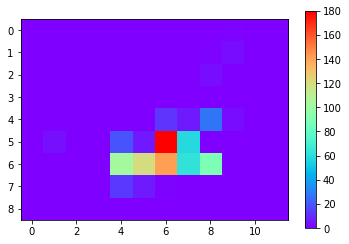

In [ ]:
import matplotlib.pylab as plt
import numpy as np
#matrix = crowd_flow_matrix[20,200,1,:,:]
matrix1 = np.load('./gowalla/22/m6_Tra.npy')
matrix2 = np.load('./gowalla/22/m7_global.npy')
matrix3 = np.load('./gowalla/22/m1_Ent.npy')
matrix_plot = matrix3[250,:,:]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.imshow(matrix_plot, interpolation='nearest', cmap=plt.cm.rainbow)

plt.colorbar()
plt.show()

In [ ]:
matrix3.shape

(318, 9, 12)

(800, 16, 12)


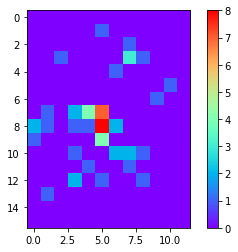

In [ ]:
import matplotlib.pylab as plt
import numpy as np
#matrix = crowd_flow_matrix[20,200,1,:,:]
matrix = np.load('./data3/global.npy')
print(matrix.shape)
matrix = matrix[200,:,:]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.rainbow)

plt.colorbar()
plt.show()

In [ ]:
matrix.shape

(18, 15)

In [ ]:
np.where(matrix > 100) # 500명 이상 포인트 약 39개 out of 200 * 130 포인트

(array([49, 49, 49, 49, 50, 50, 51, 51, 55, 63, 63, 66, 67, 72, 72, 72, 72,
        72, 72, 73, 73, 74, 75, 76, 76, 76, 80, 80, 80, 80, 80, 80, 81, 81,
        81, 84, 85, 85, 85]),
 array([162, 163, 164, 165, 163, 164, 163, 164,  36,  32,  33,  31,  31,
         38,  39,  40,  41,  43,  44,  43,  44,  45,  45,  44,  45,  46,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  79,  84,  85,  95]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


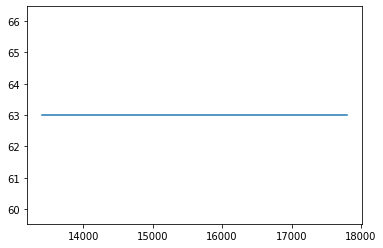

In [ ]:
result[result['cate_grp'] == 'Food'][result['freq'] == 63]['freq'].plot()

<AxesSubplot:>

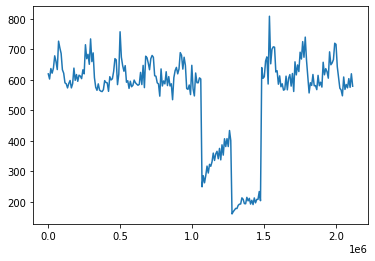

In [ ]:
result[result['xy'] == 30068]['total_exist'].plot()

<AxesSubplot:>

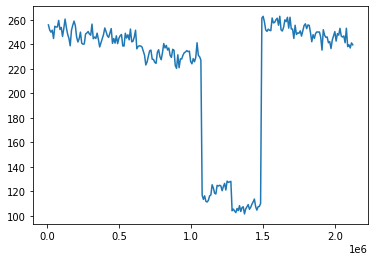

In [ ]:
result[result['xy'] == 164049]['exist_m_40'].plot()

<AxesSubplot:>

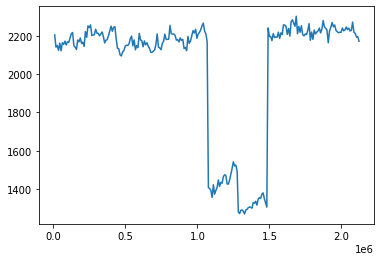

In [ ]:
result[result['xy'] == 164049]['total_exist'].plot()

In [ ]:
import pandas as pd
data = pd.read_csv('./data/result_df.csv')

In [ ]:
data.head()

,Unnamed: 0,datetime,xy,x,y,exist_m_00,exist_m_10,exist_m_20,exist_m_30,exist_m_40,...,in_f_40,in_f_50,in_f_60,in_f_70,in_f_80,in_f_90,total_exist,total_home,total_work,total_in
0,0,202103080900,1121,1,121,0.00,0.01,0.28,0.68,0.63,...,0.38,0.23,0.07,0.06,0.01,0.00,4.84,1.22,0.60,3.16
1,1,202103080900,1122,1,122,0.52,0.27,1.02,1.88,1.80,...,0.95,0.56,0.22,0.30,0.03,0.00,15.38,4.67,0.94,9.70
2,2,202103080900,1123,1,123,0.85,0.94,2.36,5.19,4.59,...,2.07,1.19,0.60,0.61,0.15,0.01,44.96,19.81,4.43,20.24
3,3,202103080900,2120,2,120,0.00,0.45,0.34,0.78,0.76,...,0.17,0.15,0.08,0.05,0.01,0.00,6.79,4.20,0.42,3.10
4,4,202103080900,2121,2,121,0.32,0.45,1.40,1.96,2.33,...,1.08,0.63,0.23,0.33,0.05,0.02,19.12,6.77,2.05,10.29


<AxesSubplot:>

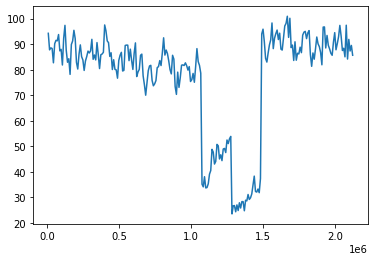

In [ ]:
data[data['xy'] == 164049]['in_m_40'].plot()

<AxesSubplot:>

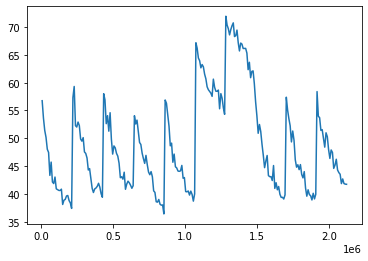

In [ ]:
data[data['xy'] == 164049]['home_m_40'].plot()

<AxesSubplot:>

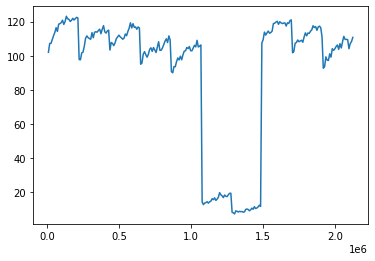

In [ ]:
data[data['xy'] == 164049]['work_m_40'].plot()

<AxesSubplot:>

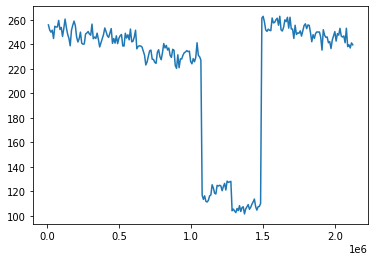

In [ ]:
data[data['xy'] == 164049]['exist_m_40'].plot()

<AxesSubplot:>

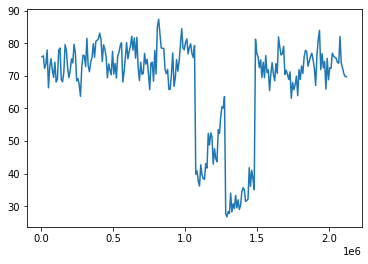

In [ ]:
data[data['xy'] == 164049]['in_m_50'].plot()

<AxesSubplot:>

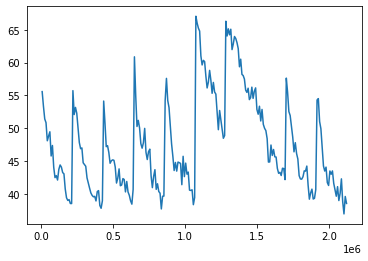

In [ ]:
data[data['xy'] == 164049]['home_m_50'].plot()

<AxesSubplot:>

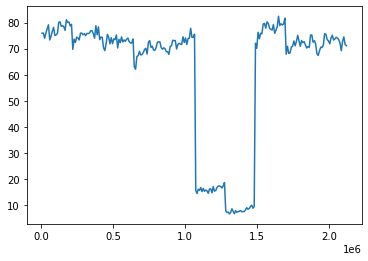

In [ ]:
data[data['xy'] == 164049]['work_m_50'].plot()

<AxesSubplot:>

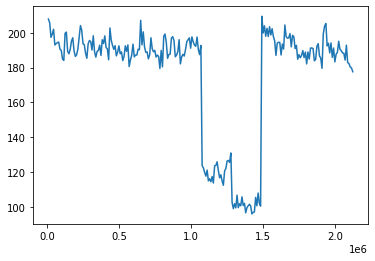

In [ ]:
data[data['xy'] == 164049]['exist_m_50'].plot()

<AxesSubplot:>

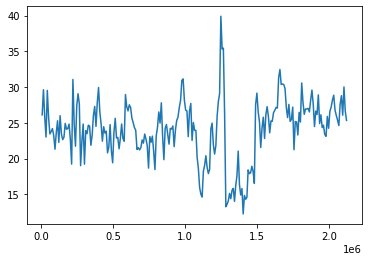

In [ ]:
data[data['xy'] == 164049]['in_f_20'].plot()

<AxesSubplot:>

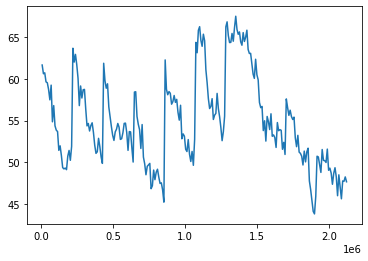

In [ ]:
data[data['xy'] == 164049]['home_f_20'].plot()

<AxesSubplot:>

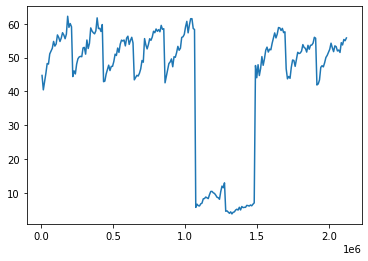

In [ ]:
data[data['xy'] == 164049]['work_f_20'].plot()

<AxesSubplot:>

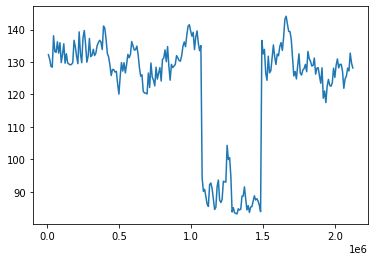

In [ ]:
data[data['xy'] == 164049]['exist_f_20'].plot()